In [178]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
city = "Springfield"
content = "business"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   384 non-null    object 
 1   name          384 non-null    object 
 2   address       376 non-null    object 
 3   city          384 non-null    object 
 4   state         384 non-null    object 
 5   postal_code   384 non-null    int64  
 6   latitude      384 non-null    float64
 7   longitude     384 non-null    float64
 8   stars         384 non-null    float64
 9   review_count  384 non-null    int64  
 10  is_open       384 non-null    int64  
 11  attributes    358 non-null    object 
 12  categories    384 non-null    object 
 13  hours         314 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 42.1+ KB


In [181]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mglME3E7esPSpIF5bias8w,Pier 1,1014 Baltimore Pike,Springfield,PA,19064,39.915270,-75.342681,2.5,8,0,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Fashion, Shopping, Department Stores, Furnitur...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
1,p79UR4tdHoJzmhwKmiXa2A,Sport Clips Haircuts of Springfield,400 S State Rd,Springfield,PA,19064,39.938634,-75.355632,2.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hair Salons, Barbers, Beauty & Spas, Men's Hai...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."
2,1o_M5JdOkJJFNj1rIDIlng,The Juice Pod,11 W Woodland Ave,Springfield,PA,19064,39.924933,-75.340216,4.0,19,1,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","Food, Juice Bars & Smoothies","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
3,nVI9wI9ujmrutJRMgHKSIg,Fiesta Maya Mexican Grill,1178 Baltimore Pike,Springfield,PA,19064,39.914238,-75.347857,4.5,130,0,"{'BusinessParking': ""{'garage': False, 'street...","Mexican, Restaurants","{'Monday': '10:30-20:0', 'Tuesday': '10:30-20:..."
4,opiv3hcNNsRDiLXsUbNw-A,Old Country Buffet,910 E Woodland Ave,Springfield,PA,19064,39.914661,-75.333685,3.0,5,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsGoo...","Restaurants, Buffets",NaN


In [182]:
df = df.drop(['city', 'state'], axis=1)

In [183]:
df['categories'] = df['categories'].fillna('Other')

In [184]:
subset_columns = df.columns.difference(['attributes', 'hours'])
df.duplicated(subset=subset_columns).sum()

0

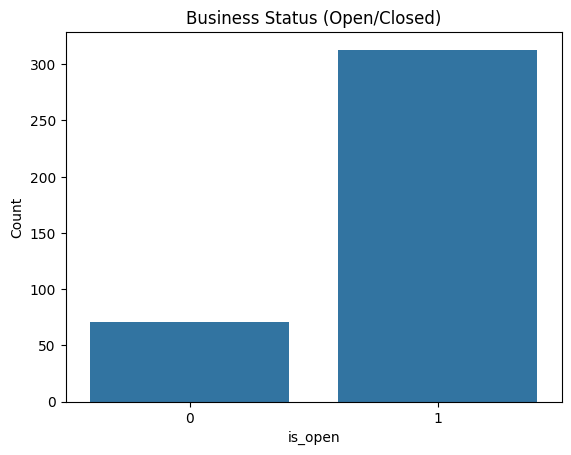

In [185]:
sns.countplot(data=df, x='is_open')
plt.title('Business Status (Open/Closed)')
plt.xlabel('is_open')
plt.ylabel('Count')
plt.show()

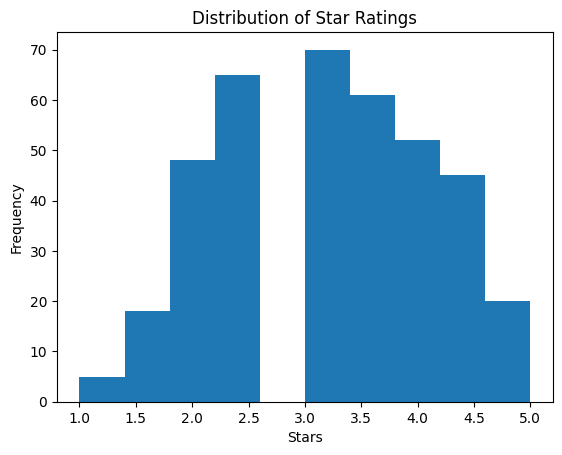

In [186]:
plt.hist(df['stars'])
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

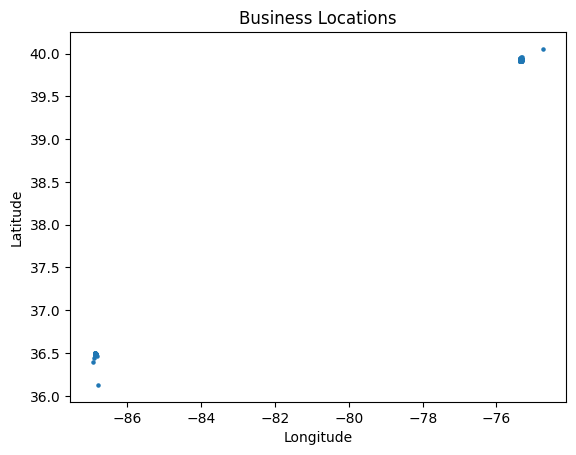

In [187]:
plt.scatter(df['longitude'], df['latitude'], s=5)
plt.title('Business Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [188]:
print(f'Number of unique categories: {df["categories"].nunique()}')

Number of unique categories: 354


In [189]:

all_categories = set()

for categories_list in df['categories']:
    x = categories_list.split(',')
    for i in x:
        all_categories.add(i.strip())

category_columns = list(all_categories)

category_df = pd.DataFrame(0, index=df.index, columns=category_columns)


for i, row in df.iterrows():
    for category in row['categories'].split(','):
        category_df.at[i, category.strip()] = 1

category_counts = category_df.sum()

# Sorting the categories by their counts in descending order
top_categories = category_counts.nlargest(10)

print("Top 10 most common categories:")
print(top_categories)



Top 10 most common categories:
Restaurants               126
Shopping                   84
Food                       56
Beauty & Spas              44
Health & Medical           40
Automotive                 32
Local Services             29
Home Services              26
American (Traditional)     26
Fast Food                  22
dtype: int64


In [194]:
top_categories = category_counts.nsmallest(50)

print("Top 10 less common categories:")
print(top_categories)


Top 10 less common categories:
Cosmetic Surgeons               1
Beer Bar                        1
Gift Shops                      1
Dog Walkers                     1
Traditional Chinese Medicine    1
Head Shops                      1
Self Storage                    1
Career Counseling               1
Kitchen & Bath                  1
Pediatric Dentists              1
Baby Gear & Furniture           1
Acupuncture                     1
Framing                         1
Blow Dry/Out Services           1
Waffles                         1
Martial Arts                    1
Child Care & Day Care           1
Keys & Locksmiths               1
Mags                            1
Travel Services                 1
Outlet Stores                   1
Financial Advising              1
Commercial Truck Repair         1
Auto Loan Providers             1
Butcher                         1
Estate Planning Law             1
Pediatricians                   1
Post Offices                    1
Commercial Truck 